<a href="https://colab.research.google.com/github/ykitaguchi77/Laboratory_course/blob/master/6.%20Python%E3%82%92%E7%94%A8%E3%81%84%E3%81%9FLinear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**6. Linear Regression using sklearn**

In [25]:
import numpy as np
!pip install scikit-learn==1.1.0 #scikit-learn 1.2以降ではBoston datasetが削除されているため
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

#Bostonの住宅価格データ
標本数506、よく練習に使われるデータ

In [ ]:
boston = load_boston()
np.random.seed(1234)

In [ ]:
boston

In [ ]:
import pandas as pd

#説明変数
X_array = boston.data
#目的変数
y_array = boston.target
df = pd.DataFrame(X_array, columns = boston.feature_names).assign(MEDV=np.array(y_array))

df

In [92]:
# 説明変数：13項目のうち1つだけ使う
x = boston.data[:, 5]
# 目的変数：住宅価格のデータを使う
y = boston.target

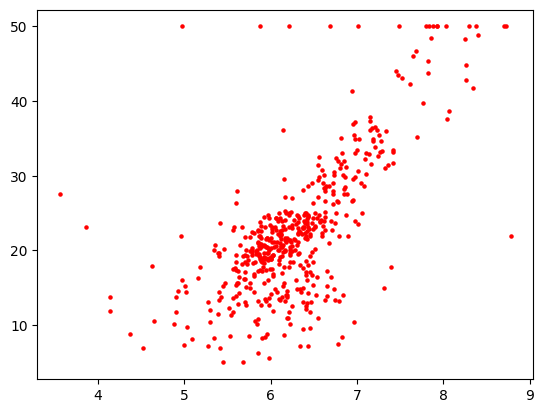

In [87]:
# ----------------散布図を作成-------------------
plt.scatter(x, y, s=5, c="red")

#**最急降下法について学習しよう**
Cost: J = (sum((θ×X - y)^2)/2m <br>
Cost function: J(θ) =1/2m * Σ(hθ(x(i)^-y(i)))^2 <br>

最急降下法：(Cost function J(θ)の微分を減算する）<br>
θj = θj - α * 1/m * Σ((h(x(i)-y(i))*Xj(i) )

In [70]:
#今回は一次関数で近似します。
#y=bx+a (y=a*1 +b*x)の係数[a,b]としてランダムな値を作成する
theta = np.random.random(len(X[0]))
theta

array([0.50308317, 0.01376845])

In [71]:
# [1,x]に相当する行列を作成する
X = np.array([[1, v] for v in x])
X

array([[1.   , 6.575],
       [1.   , 6.421],
       [1.   , 7.185],
       ...,
       [1.   , 6.976],
       [1.   , 6.794],
       [1.   , 6.03 ]])

In [72]:
# 微分値により係数をどれぐらい動かすかを決定する
alpha = 0.01

In [ ]:
y_pred = np.dot(X, theta)
y_pred

In [85]:
#y=bx+a (y=a*1 +b*x)の係数[a,b]としてランダムな値を作成する
theta = np.random.random(len(X[0]))

# [1,x]に相当する行列を作成する
X = np.array([[1, v] for v in x])

# 微分値により係数をどれぐらい動かすかを決定する
alpha = 0.01

# ------wをちょっとずつ変えていくループを実行------
# ループ回数100回、1000回、10000回、100000回でwを保存する
theta_1 = []
theta_10 = []
theta_100 = []
theta_1000 = []
theta_10000 = []
for i in range(100000):
    # y_pred=b*1+a*xに先ほどの行列を代入して予測値y_predを計算する。dotは行列の積を計算するコード
    y_pred = np.dot(X, theta)
    # 最小二乗法の損失関数 loss_func = (y-y_pred)^2 = (y-theta*X)^2
    # loss_funcをthetaで微分すると、2*theta*X^2  2Xy = 2(theta*X-y)*X = -2(y-y_pred)*X
    dw = -2*np.dot((y - y_pred), X) / len(X)
    # wをちょっとだけ動かす
    theta -= alpha * dw

    #1, 10, 100, 1000, 10000, 100000回目のthetaを記録
    if i == 1-1:
        # listはnp.copyしないとコピー元と同期してしまうので注意！
        theta_1 = np.copy(theta)
        print(f"dw_1: {dw}")
    if i == 10-1:
        theta_10 = np.copy(theta)
        print(f"dw_10: {dw}")
    if i == 100-1:
        theta_100 = np.copy(theta)
        print(f"dw_100: {dw}")
    elif i == 1000-1:
        theta_1000 = np.copy(theta)
        print(f"dw_1000: {dw}")
    elif i == 10000-1:
        theta_10000 = np.copy(theta)
        print(f"dw_10000: {dw}")
    elif i == 100000-1:
        theta_100000 = np.copy(theta)
        print(f"dw_100000: {dw}")

dw_1: [ -37.84497687 -246.38117302]
dw_10: [ 0.86411072 -0.13589379]
dw_100: [ 0.84561561 -0.13293506]
dw_1000: [ 0.68103509 -0.10706217]
dw_10000: [ 0.07818698 -0.01229139]
dw_100000: [ 3.11014877e-11 -4.94723103e-12]


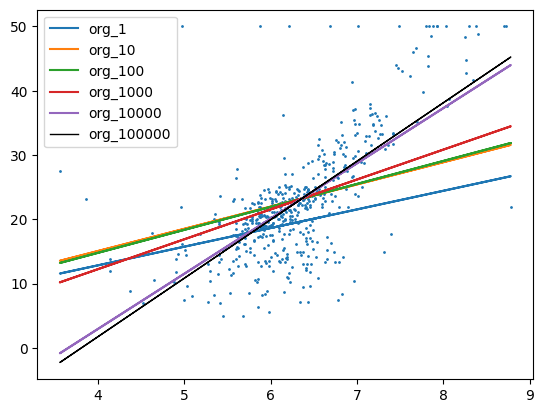

In [86]:
# ----------------散布図を作成-------------------
plt.scatter(x, y, s=1)

# ----------------計算式の結果-------------------
plt.plot(x, np.dot(X, theta_1), label='org_1')
plt.plot(x, np.dot(X, theta_10), label='org_10')
plt.plot(x, np.dot(X, theta_100), label='org_100')
plt.plot(x, np.dot(X, theta_1000), label='org_1000')
plt.plot(x, np.dot(X, theta_10000), label='org_10000')
plt.plot(x, np.dot(X, theta_100000), c='black', linewidth=1.0, label='org_100000')


plt.legend()
plt.show()

In [ ]:
# ######### sklearnのツールLinearRegressionを使って回帰 ###########
# ものすごく簡単...
lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)
pred = lr.predict(X)

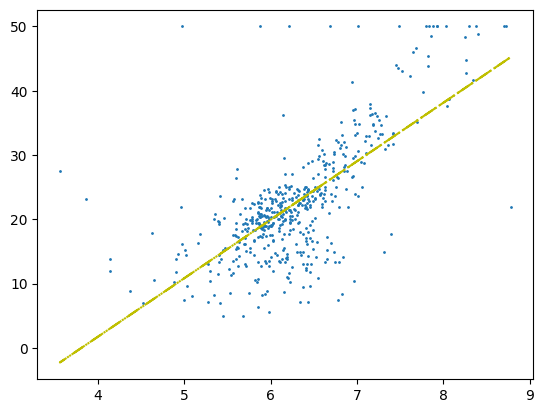

In [ ]:
# ----------------散布図を作成-------------------
plt.scatter(x, y, s=1)
# ---------------sklearnの結果------------------
plt.plot(x, pred, c='y', linestyle='dashdot', label='sklearn')
